# Engaging Complexity: Introduction to Information Theory

<table style="background-color: white;">
<tr>
<td>
<img src="binary_symmetric.png" alt="binary symmetric channel" style="width: 80%;"/>
</td>
<td>
<img src="Shannon.jpeg" alt="Claude Shannon" style="width: 120%;"/>
</td>
</tr>
</table>


In [2]:
import requests
import pandas as pd
#!pip install ipywidgets
import ipywidgets
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
import string
punct = list(string.punctuation)
from collections import Counter
import numpy as np
import scipy
from scipy.stats import entropy
from scipy.stats import norm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from math import comb
from collections import Counter
import plotly.express as px

[nltk_data] Downloading package punkt to /Users/james/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/james/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/james/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Topic 1: Probability distributions

## 1. What is a probability distribution?

A probability distribution is a representation of how likely it is that a variable can take a particular value, for all possible values that the variable can take. There are two types of probability distribution:

* A discrete probability distribution is defined in a variable that can take a finite number of possible states
* A continuous probability distribution is defined an a variable that can take an infinte number of possible states.

A probability can take a value between 0 and 1 inclusive. A value of 0 means that it is impossible for a variable to take that state; a value of 1 means that taking that state is guaranteed. Because a probability distribution is defined across all possible states of a variable, its values must sum to 1 (i.e. it is guaranteed that the system will be in <i>some</i> state).

### Example 1: A discrete probability distribution

<img src="NUTS.png" alt="UK NUTS regions" style="width: 40%;"/>

Let's imagine we're interested in picking a random resident of the UK. There are only a finite number of regions they can be resident in at a specific point in time. Once we know the population of each region, we can work out the probability that they are resident in that region by dividing by the regional population by the total UK population:

$$P(resident\;in\;region) = \frac{regional\;population}{UK\;population}$$

According to the Office of National Statistics, the UK population is 67,025,542. Given regional populations, this gives the following distribution:


| Region | Population | Probability |
|:---------|:--------:|:--------:|
| Scotland   |  5463992   | 0.081|
| North East  |  2673468   |  0.039|
|  North West  |  7355476   | 0.109|
|  Yorkshire and<br>the Humber  | 5517920  | 0.082 |
|  Northern<br>Ireland | 1898785 | 0.028 |
|  East<br>Midlands | 4861236 | 0.072 |
|  West<br>Midlands | 5962551| 0.088 |
|  East of<br>England | 6259318| 0.093 |
|  London| 9004875| 0.134 |
|  South East| 9212113| 0.137 |
|  South West | 5660791|0.084 |
|  Wales | 3155017|0.047 |

Charting this on a barplot gives us a graphical representation of our discrete probability distribution:

<img src="populations_.png" alt="chart" width="600" height="400"/>


## Example 2: A continuous probability distribution

Let's imagine we're interested in the probability of a random person being a partcular height. While there are physical limitations on how tall a human being can be (the record is 272cm), every human has been every value of height smaller than their current height. This means that height varies continuously. Height also forms a normal distribution, which means that extreme values are uncommon. Allowing that different ethnicities have different average heights, the overall mean for humans is around 175cm with a standard deviation of 8cm.

<img src="Height.png" alt="height" style="width: 60%;"/>

Though we will be dealing with discrete distributions, are are two features of continuous probability distributions you should probably be aware of:

* Where the sum of probabilities in a discrete distribution is 1, the area under the curve in a continuus distributions sums to 1.
* Because a continuous distribution technically contains an infinite number of values, the probability of any one exact value occurring is 0. Instead, probability is defined in a range of values––see below.
* To get the probability of being in a particular range (which can be arbitrarily small), we caculate the area under the curve between the top and bottom of our ranges.

<img src="Height_strip.png" alt="height" style="width: 60%;"/>

In [13]:
mu = 175    # Mean height
sigma = 8 #Standard deviation

height_distribution = norm(loc=mu, scale=sigma)

lower = 179
higher = 181

# Compute the area under the curve in our range of interest
area = height_distribution.cdf(higher) - height_distribution.cdf(lower)

print(f"The probability of person being between {lower}cm and {higher}cm is {area}")

The probability of person being between 179cm and 181cm is 0.08191018634911862


## 2. Joint probability distributions

A joint probability is defined across the states of two variables. It registers the probability of every possible pair of states of the two variables occurring. Let's explore with an example.

Every resident of the UK lives in a specfic region; we have already worked out the probability of a random person living in each of these regions. However, every UK resident also has an ethnicity. Census data records these as follows:

| Ethnicity | Population | Probability |
|:---------|:--------:|:--------:|
| Asian   |  5026915.6  | 0.075|
| Black  |  2211842.8   |  0.033|
|  Mixed  |  1474561.9   | 0.022|
|  Other  | 670255.4  | 0.01 |
|  White | 57641966.1 | 0.86 |


A joint probability distribution across region of residence ($X$) and ethnicity ($Y$) would list the probility of random person being of a specific ethnicity and living in a specific region, for all values of region and ethnicity. How could we calculate this? 

This is done using the law of $AND$, or the multiplication rule. Namely, for any two independent events, the probability of their joint occurence is the product of their individual probabilities. (The law of $OR$ states that the probability of one OR another independent events occurring is ascertained by adding their probabilities.)

Let's take an example: What's the probability of residing in the North West and being of Asian ethnicity?

$$P(X=North\;West)=0.109$$
$$P(Y=Asian)=0.075$$
$$P(Y=North\;West,\;Y=Asian)=0.109\times{0.075}=0.008175$$



### Let's create a dataframe that gives us the joint probabilities for all pairs of values for region and ethnicity:

In [14]:
UK_regions = {'Scotland': 5463992, 'North East': 2673468, 'North West': 7355476, 'Yorkshire and the Humber': 5517920, \
              'Northern Ireland': 1898785, 'East Midlands': 4861236, 'West Midlands': 5962551, \
              'East of England' : 6259318, 'London': 9004875, 'South East': 9212113, 'South West': 5660791, \
              'Wales': 3155017}
total_pop = sum([i for i in UK_regions.values()])
region_prob = [i/total_pop for i in UK_regions.values()]

UK_ethnicity = {'Asian': 0.075, 'Black': 0.033, 'Mixed': 0.022, 'Other': 0.01, 'White': 0.86}
ethnic_prob = list(UK_ethnicity.values())


table = [[] for x in range(len(UK_regions.keys()))]

for i in range(len(UK_regions.keys())):
    for j in ethnic_prob:
        table[i].append(region_prob[i]*j)
    

joint_distribution = pd.DataFrame(table, columns = UK_ethnicity.keys(), index = UK_regions.keys())





In [15]:
joint_distribution

,Asian,Black,Mixed,Other,White
Scotland,0.006114,0.002690,0.001793,0.000815,0.070108
North East,0.002992,0.001316,0.000878,0.000399,0.034303
North West,0.008231,0.003621,0.002414,0.001097,0.094378
Yorkshire and the Humber,0.006174,0.002717,0.001811,0.000823,0.070800
Northern Ireland,0.002125,0.000935,0.000623,0.000283,0.024363
East Midlands,0.005440,0.002393,0.001596,0.000725,0.062374
West Midlands,0.006672,0.002936,0.001957,0.000890,0.076505
East of England,0.007004,0.003082,0.002055,0.000934,0.080313
London,0.010076,0.004434,0.002956,0.001343,0.115541
South East,0.010308,0.004536,0.003024,0.001374,0.118200


## In-class exercise

1. What day of the week were you born on? [Go here to find out](https://www.timeanddate.com/date/weekday.html)
2. Is the day of the month you were born in an odd or even number?

Now, let's create a dataframe with these values for the whole class.

In [16]:
days = {'Monday': 2, 'Tuesday': 5, 'Wednesday': 6, 'Thursday': 3, 'Friday': 3, 'Saturday': 2, 'Sunday': 5}
oddness = {'Odd': 16, 'Even': 10}

total = sum([i for i in days.values()])
days_prob = [i/total for i in days.values()]
oddness_prob = [i/total for i in oddness.values()]

table = [[] for x in range(len(days.keys()))]

for i in range(len(days.keys())):
    for j in oddness_prob:
        table[i].append(days_prob[i]*j)
    

class_distribution = pd.DataFrame(table, columns = oddness.keys(), index = days.keys())


In [17]:
class_distribution

,Odd,Even
Monday,0.047337,0.029586
Tuesday,0.118343,0.073964
Wednesday,0.142012,0.088757
Thursday,0.071006,0.044379
Friday,0.071006,0.044379
Saturday,0.047337,0.029586
Sunday,0.118343,0.073964


#### Some questions:

1. What is the probability of a person having an odd birthday on a weekend?
2. Select two people at random. What's the probability they both share a non-weekend birthday OR an odd birthday?
3. Select two people at random. What's the probability they both share a the same day of the week as a birthday?


# Topic 2: Shannon entropy

### Surprise

What is entropy? There are several kinds, but the two most common are <b>thermodynamic entropy</b> and <b>information-theoretic entropy</b>. Thermyodynamic entropy is a <b>measure of disorder</b> in a system; information-theoretic entropy (called Shannon entropy) is a <b>measure of unpredicatbility</b> in a system. Though both concepts are related, we are here interested in Shannon entropy. 

The first step in understanding entropy comes with defining the notion of <b>surprise</b> (sometimes called surprisal, information, or self-information). When is an event surprising? When it's unlikely but happens anyway. Therefore, surprise is inveresely proportional to probability: high probability events have low surprise (we expect them to occur) while low probability events have high surprise (we don't expect them to occur).

Let's take an example. What would surprise us most if it fell from the sky––frogs, ash, snow, or rain?

<img src="frogs.png" alt="frogs" style="width: 60%;"/>

The answer, obviously, is frogs––but how can we quantify this? We need a function that, in the $0$ to $1$ range, makes small probabilities large and large probabilities small. Do we have such a function?

Yes we do! The negative of the logarithmic function does exactly this. That is:

$$S = -\log_{2}(p)$$

If we define surprise in this way and plot the results, we can quickly see why it works:

<img src="surprise.png" alt="surprise" style="width: 60%;"/>


### Expected value

The second step in understanding entropy comes with the idea of <b>expected value</b>. This captures the long-term output of a system. It is calculated by mutiplying the probability of system's state by the output of the system's state, and adding the results for all the states. 

Imagine my system, $X$ is a biased coin, with $P(heads) = 0.75$ and $P(tails) = 0.25$. Now, further suppose that I get £25 every time I get a head, and £35 every time I get a tail. My expected value for $X$, $E[X]$ is given by:

$$E[X] = (0.75\times{25})+(0.25\times{35})= £27.5$$

That is, the long-run average of my takings will trend towards £27.5. We can see this by simulating 1,000 trials and plotting the running average:

<img src="expected_value_.png" alt="ev" style="width: 60%;"/>

#### An exercise

Imagine you have a biased dice with six faces. You get the GBP value of the face that turnsn up––i.e. if face 3 turns up, you get £3. Now, imagine the bias is as in the table below. What is the expected value?

| Face   | Face 1 | Face 2 | Face 3 | Face 4 | Face 5 | Face 6 |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-----------:|:----------:|
| **Probability**     | $\frac{1}{10}$| $\frac{3}{10}$| $\frac{1}{4}$ | $\frac{3}{20}$| $\frac{1}{10}$| $\frac{1}{10}$|



In [118]:

payoff_dice = [1, 2, 3, 4, 5, 6]
biased_dice = [1/10, 3/10, 1/4, 3/20, 1/10, 1/10]
true_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

def e_value(probs, payoff):
    value = []
    for i in range(len(probs)):
        value.append(probs[i]*payoff[i])
    expected_value = sum(value)
    return expected_value
    

In [120]:
e_value(biased_dice, payoff_dice), e_value(true_dice, payoff_dice)

(3.15, 3.5)

### Definition: Entropy is the expected value of surprise

We can now attempt to define Shannon entropy, often denoted by $H$. Entropy is a measure of unpredictability and therefore of surprise; we have already seen how $-log_{2}(p)$ quantifies surprise for a single event. In entropy, we are interested in the surprise associated with all the states (i.e. events) of a specfic system. In other words, <b>entropy is the expected value of surprise</b>. To calculate it, we multiply the surprise of a state by its probability of occurring, and add up the results for every state of the system. 

This is the formula for entropy, where $H$ is the entropy measure and $X$ is a discrete probability distribution over $n$ states of a system:

$$X = (x_1, x_2, x_3, ... x_n)$$

$$H(X) = -\sum_{x \in X} p(x)\log_{2} p(x)$$

The $\sum_{x \in X}$ notation here simply means "add up the results for every value of $x$ in $X$". 

## Example

<img src="urn.png" alt="ev" style="width: 30%;"/>


What does this look like in practice? Let's take an example. An urn contains 7 red balls and 3 blue balls. What is the entropy of this system $X$? The answer comes with recognising that it defines a probability distribution across colours:

| Colour   | Blue | Red |
|:-------------:|:-------------:|:-------------:|
| **Probability**  | $\frac{3}{10}$| $\frac{7}{10}$|

Plugging these values into the entropy formula then gives:


$$H(X) = -\begin{bmatrix}{\frac{7}{10}\times \log_{2}(\frac{7}{10}) + \frac{3}{10}\times \log_{2}(\frac{3}{10})}\end{bmatrix}$$

$$H(X) = -[-0.5210896782498619 - 0.3602012209808308]$$

$$H(X) = 0.8812908992306927\text{ bits}$$

Compare with an urn that contains 5 red balls and 5 blue balls:

$$H(X) = -\begin{bmatrix}{\frac{5}{10}\times \log_{2}(\frac{5}{10}) + \frac{5}{10}\times \log_{2}(\frac{5}{10})}\end{bmatrix}$$

$$H(X) = -[-0.5 - 0.5]$$

$$H(X) = 1\text{ bits}$$

Because the urn with equal numbers of red and blue balls is harder to predict, it has higher entropy than the system with more red than blue balls. 

### Calculating entropy using `scipy`

Usefully, python allows us to calculate entropy easily using the `scipy` library. [Find the docs here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html).

In [29]:
from scipy.stats import entropy

regions_e = entropy(region_prob)
ethnic_e = entropy(ethnic_prob)

print("Entropy of probability distribution of residing in UK region in bits:", regions_e)
print("Entropy of probability distribution of belonging to ethnicity in bits:", ethnic_e)

Entropy of probability distribution of residing in UK region in bits: 2.4038891997141607
Entropy of probability distribution of belonging to ethnicity in bits: 0.5665682812818006


# Topic 3: Problem-solving using entropy

### 1. Distinguishing between language and noise

One particular value of entropy is in distinguishing between in information containing signal and noise. For a signal to be present, it must be encoded––and encoding implies repetition. Here, we will explore an example of how we might use entropy to do this for written text.

1. We we will split two texts––Emily Brontë's <i>Wuthering Heights</i> and William Shakespeare's <i>Collected Works</i>––into their constituent words.
2. We will generate 25 texts made up of random strings of characters of characters of random length.
3. We will cryptographically hash each word of each text using the SHA-256 algorithm to make them indistinguishable to the human eye.
4. We will scramble the list of texts so we don't know where the real and the fake ones are.
5. We will measure the entropy of the resulting hashed word frequency distributions to see if we can identify the real texts.

In [30]:
#Import and demo the hashing library

import hashlib

input_string = "I am your naughty browsing history"

# Create a SHA-256 hash object
hash_object = hashlib.sha256()
hash_object.update(input_string.encode())

hex_dig = hash_object.hexdigest()

print(hex_dig)


43b77df40a9246f9f108eea17ecdcca30a480c8d0c966cc4040ab8bef838c4ad


In [31]:
#Open and extract words from our literary texts

with open('wuthering_heights.txt', 'r') as f:
    text = f.read()
    
text = text.encode('ascii', 'ignore')
text = text.decode()
text = ' '.join(text.splitlines())
text = text.lower()
words = word_tokenize(text)
lemmas_wh = [lemmatizer.lemmatize(i) for i in words]

with open('shakespeare_cw.txt', 'r') as f:
    text = f.read()
    
text = text.encode('ascii', 'ignore')
text = text.decode()
text = ' '.join(text.splitlines())
text = text.lower()
words = word_tokenize(text)
lemmas_sh = [lemmatizer.lemmatize(i) for i in words]
lemmas_sh = lemmas_sh[:len(lemmas_wh)]

In [32]:
#Generate our noisy texts

import random
import string

def randoms(n, min_length, max_length):
    random_strings = []
    for _ in range(n):
        length = random.randint(min_length, max_length)
        random_str = ''.join(random.choice(string.ascii_lowercase) for _ in range(length))
        random_strings.append(random_str)
    return random_strings

n = len(lemmas_wh)  # Number of strings
min_length = 1  # Minimum length of strings
max_length = 12  # Maximum length of strings

texts = []

for i in range(25):
    texts.append(randoms(n, min_length, max_length))




In [33]:
#Shuffle and then cryptographically hash all our texts

import random
all_text = texts + [lemmas_wh] + [lemmas_sh]
random.shuffle(all_text)

hashes = [[] for i in range(len(all_text))]

for i in range(len(all_text)):
    for j in all_text[i]:
        hash_object = hashlib.sha256()
        hash_object.update(j.encode())
        hex_dig = hash_object.hexdigest()
        hashes[i].append(hex_dig)
    



In [34]:
#Get counts of hashed words and create probability distribution

from collections import Counter

distributions = []

for i in hashes:
    item_counts = Counter(i)
    prob = [j/len(i) for j in item_counts.values()]
    distributions.append(prob)





Text(0, 0.5, 'bits')

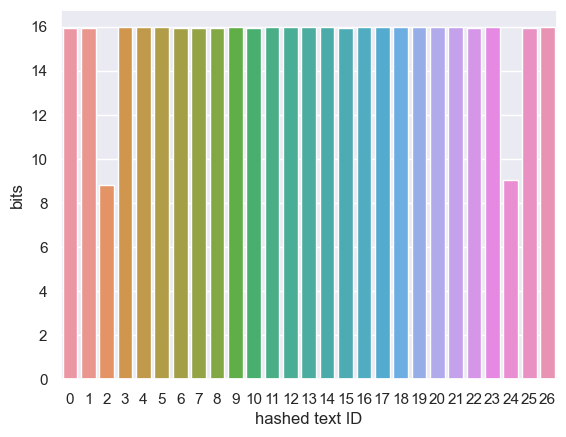

In [35]:
#Calculate and plot entropies for each text

entropies = [entropy(i, base = 2) for i in distributions]
entropies = pd.Series(entropies)

sns.barplot(x = entropies.index, y = entropies.values)
plt.xlabel('hashed text ID')
plt.ylabel('bits')

### 2. Joint entropy

Just as we can have a joint probability distribution made up of two probability distributions, so too can we have joint entropy. This is given by the formula below, but in practice, we will usually already have the joint distribution worked out in our data.

$$X = (x_1, x_2, x_3, ... x_n)$$

$$Y = (y_1, y_2, y_3, ... y_n)$$

$$H(X) = -\sum_{y \in Y}\sum_{x \in X} p(x,y)\log_{2} p(x,y)$$

#### Worked example: Flipping a coin at the traffic lights.

<span style="font-size: 200%; font-weight: bold;">Y</span>ou're an idle loafer standing at a set of traffic lights flipping a coin. Each coin flip coincides with a traffic light colour. What is the joint entropy of this system? First, let's define the two probability distributions we're working with:

| Colour   | Green | Red | Amber |
|:-------------:|:-------------:|:-------------:|:-------------:|
| **Probability**  | $\frac{2}{5}$| $\frac{2}{5}$| $\frac{1}{5}$ | 

| Face   | Heads | Tails |
|:-------------:|:-------------:|:-------------:|
| **Probability**  | $\frac{1}{2}$| $\frac{1}{2}$|

Now, let's get the joint probability distribution:

|   | Green | Red | Amber |
|:-------------:|:-------------:|:-------------:|:-------------:|
| **Heads**  | $\frac{1}{5}$| $\frac{1}{5}$| $\frac{1}{10}$ | 
| **Tails**  | $\frac{1}{5}$| $\frac{1}{5}$| $\frac{1}{10}$ | 


Next, we get the entropy for the <i>Heads</i> row and the entropy for the <i>Tails</i> row and we add them:

$$H(X,Y) = -[(\frac{1}{5}\times \log_2\frac{1}{5} + \frac{1}{5}\times \log_2\frac{1}{5} + \frac{1}{10}\times \log_2\frac{1}{10}) + (\frac{1}{5}\times \log_2\frac{1}{5} + \frac{1}{5}\times \log_2\frac{1}{5} + \frac{1}{10}\times \log_2\frac{1}{10})$$

$$H(X,Y) = 2.52 \text{ bits}$$

In this case, the joint entropy is the sum of the individual entropies for <i>Heads</i> and <i>Tails</i>. This means that these two systems are independent: the coin toss outcome does not depend on the traffic light colour, or vice versa. However, it is frequently the case that two systems are not independent: i.e. we can partially predict the state of one from the state of the other. In this scenario the joint entropy can be smaller than the sum of the entropies of the two distributions:

$$H(X,Y)\le H(X) + H(Y)$$

Let's take a real-world example: the distribution of ages across the regions of the UK. 

* <b>Question: Are these distributions independent of each other?</b>

In [113]:
pop = pd.read_excel("pop_age.xlsx", index_col = 0)
pop

,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,...,Y101,Y102,Y103,Y104,Y105,Y106,Y107,Y108,Y109,Y110
North East,26531,27079,28198,29269,29603,29942,30703,31585,32096,31887,...,113,73,44,28,17,8,5,6,0,6
Yorkshire And The Humber,59441,60786,63551,65667,66477,66706,67688,69389,69501,68688,...,247,161,102,62,31,16,12,1,2,2
East Midlands,50251,51560,53726,56034,57285,57483,58248,60024,60649,59584,...,225,155,100,57,31,16,13,5,0,0
West Midlands,66997,68331,71150,73220,73716,74366,76004,77532,77407,75673,...,261,170,108,77,29,20,12,4,7,0
East Of England,67908,70173,73454,76027,77383,77722,78905,80545,81004,79994,...,310,212,130,73,51,20,10,5,3,4
South East,95675,98701,103250,107569,110452,111447,113275,117109,119405,118675,...,542,362,224,128,80,43,11,9,6,5
South West,54328,55834,57710,60282,61954,62763,64236,66459,67350,66393,...,360,249,155,101,56,25,14,5,0,7
Wales,31547,32332,32975,34096,34876,35166,35742,36777,37755,37750,...,154,98,68,42,17,14,3,2,1,4
Northern Ireland,22600,23158,23900,24716,25090,25014,25247,25887,26234,25993,...,56,50,18,15,5,0,0,0,0,0
Scotland,51005,51845,53601,55487,56994,57682,58506,59837,61528,60985,...,203,124,74,43,20,13,5,2,2,1


In [121]:
total = pop.sum().sum()
joint_df = pop/total

prob_regions = [i/total for i in pop.sum(axis =1)]
prob_ages = [i/total for i in pop.sum()]


<Axes: >

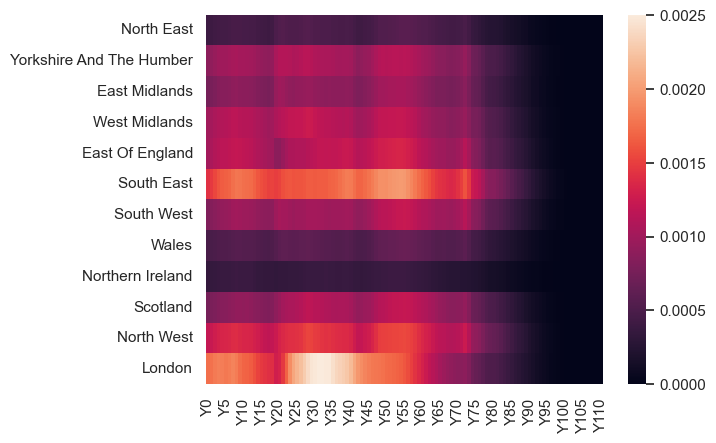

In [122]:
sns.set()

sns.heatmap(joint_df)

In [123]:
sum_entropy = entropy(prob_regions) + entropy(prob_ages)

In [124]:
print("The entropy of the population distribution by region is", entropy(prob_regions), "bits")
print("The entropy of the population distribution by age is", entropy(prob_ages), "bits")
print("The joint entropy is", entropy(joint), "bits")
print("The difference between the joint entropy and the sum of the individuals is", sum_entropy- entropy(joint), "bits")

The entropy of the population distribution by region is 2.403889199714161 bits
The entropy of the population distribution by age is 4.486789298766948 bits
The joint entropy is 6.88498780990256 bits
The difference between the joint entropy and the sum of the individuals is 0.005690688578549263 bits


$$H(X,Y) < H(X) + H(Y)$$

# Topic 3: Measuring model fit

> All models are wrong, but some are useful
>
>
> ––<cite>George Box</cite>

As a description of likelihood of the states of a system, a probability distribution is a <b>model</b> of that system. As a measure of the unpredictability of a system, so too is the entropy of a system a model of it. It is often the case that we have several models of a system and wish to judge which is the best match. This measured using what are known as [Bregman divergences](https://danmackinlay.name/notebook/bregman_divergences). In our case, we are interested in a specific divergence called the <b>Kullback-Leibler</b> or <i>$D_{KL}$</i> divergence. What is this quantity?

Imagine we have true model $P(X)$. That is, $P(X)$ is a proability distribution across $X$, the states of a system. Let's suppose that $P(X)$ is a complicated distribution that it's hard to work with. If we don't need to be exact, then we can use a simpler distribution, $Q(X)$, to approximate $P(X)$. There are lots of situations where this is a useful feature. The question is, how can we measure how good a fit different candidates for $Q(X)$ might be? This is what the <i>KL</i> divergence does. Consider the two scenarios below:

<img src="KL_.png" alt="KL" style="width: 60%;"/>

Compared to the top panel, the estimating distribution $Q_2{(X)}$ in the bottom panel covers more of $P(X)$ than $Q_1{(X)}$ in the top panel. Thus, for any range of values of $X$, the values of $Q_2{(X)}$ will, on average, be closer to $P(X)$ than $Q_1{(X)}$. How might we quantify this?

Let's go back to our definition of entropy as the expected value of surprise. In all cases, $Q(X)$ will be more surprising than $P(X)$. This is because $Q(X)$ will always contain some error; if it was a perfect fit, we wouldn't need to use an estimation. However, the better the fit is, the less surprise $Q(X)$ will add to $P(X)$. We can calculate this by getting the surprise for every value of $X$ under $P$ and under $Q$ and subtracting $P$ from $Q$ to get the excess surprise under $Q$. (Here, $S$ denotes the excess surprise.)

$$S(X=x) = [-\log_{2}Q(x)] - [-\log_{2}P(x)]$$
$$S(X=x) = [-\log_{2}Q(x) + \log_{2}P(x)]$$
$$S(X=x) = [\log_{2}P(x) - \log_{2}Q(x)]$$

Multiplying by the true probability of $x$, here given by $P(x)$, then gives us the expected value, $E[S]$:

$$E[S(X=x)] = P(x)[\log_{2}P(x) - \log_{2}Q(x)]$$

Using the laws of logs, we can turn this difference (subtraction) into a quotient (division):

$$E[S(X=x)] = P(x)\log_{2}\frac{P(x)}{Q(x)}$$

The final step comes with getting the expected value of excess surprise, $E[S]$, for all values of $X$. We do this (as with entropy) by summing across all values of $X$:


$$D_{KL} = \sum_{x \in X}P(x)\log_{2}\frac{P(x)}{Q(x)}$$

In practice, however, we rarely need to calculate this by hand. The `scipy` `entropy` function gives back the $D_{KL}$ when you pass it two distibutions, where:

* Both distributions are the same length
* Neither distribution contains a zero value



## Example 1: Bringing down the house with the Kullback-Leibler divergence

<p align="center">
<img src="purple_dice.png" alt="dice" style="width: 15;"/>
</p>

<span style="font-size: 200%; font-weight: bold;">Y</span>ou are a professional scoundrel whose favourite scam of the day is the scam in your head before the first scam of the day. You and your scoundrel pals have gained short-term access to the dice factory that supplies all the Las Vegas casinos. It can make both biased and unbiased dice; this amazing functionality exists because it is a dice factory and not, say, a bakery. You are aware of the following facts:

* Pharoah's Casino will be taking its monthly order of new dice tomorrow.
* Quality control at Pharoah's take a random selection of dice from each order and run 1000 trials to evaluate the expected value; if the expected value differs from 3.5 by more than 10%, Pharoah's rejects the order as biased.
* In all dice games where you play against the house, the odds favour the house over the long run.
* If your takings exceed the expected value of takings for a player of that game by 10% over 100 runs of the game, the house will suspect you of cheating and you'll end up swimming with the fishes somewhere in the Nevada desert.

#### Question: How might you use your knowledge of information theory to exploit this situation?

1. Create a biased order of dice that disadvantages the house but gets through quality control.
2. Create a second batch of biased dice that approximates as closely as possible the biased house dice, but still gives you and your pals an advantage <i>without</i> triggering the suspicion of cheating––i.e. you'll win less money per winning event but you'll win more often than the house.

#### Data: What have you got to work with? 

You've already figured out the bias for house dice that stays just within quality control; the expected value, $E[X]$, for this is 3.15––exactly 10% lower than the expected value for a fair dice.

| Face   | Face 1 | Face 2 | Face 3 | Face 4 | Face 5 | Face 6 |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|:-----------:|:----------:|
| **Probability**     | $\frac{1}{10}$| $\frac{3}{10}$| $\frac{1}{4}$ | $\frac{3}{20}$| $\frac{1}{10}$| $\frac{1}{10}$|


#### Constraints: What practical difficulties must you overcome?

You don't have much time in the dice factory, and have to produce enough dice to match the whole casino order and the smaller batch for the gang to use. This means you must save time by biasing only two faces of the dice the gang will use. This means our estimating distribution, $Q$, will be of the form:

| Face   | Face 1 | Face 2 | Face 3 | Face 4 | Face 5 | Face 6 |
|:-------------:|:------:|:------:|:------:|:------:|:------:|:------:|
| **Probability**     | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $\frac{1}{6}$ | $x$ | $y$ |

#### What do you do???

Like any sensible scoundrel, you use the Kullback-Leibler divergence to estimate the values for $x$ and $y$. Given that $x$ and $y$ must sum to $\frac{1}{3}$, we can get the $D_{KL}$ for all values of $p \le{\frac{1}{3}}$, where $x = p$ and $y = \frac{1}{3}-p$. If these values give a higher expected value than the casino dice but lower than a fair dice, we're in business:

$$E[\text{casino}] < E[\text{scoundrel}] \le E[\text{fair}]$$

/Users/james/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/james/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The minimum $D_{KL}$ divergence is 0.15483245290434242 bits,\n with $p$ = 0.164991499149915')

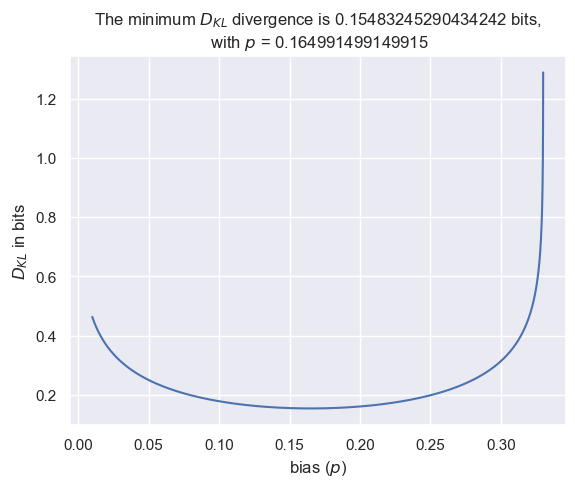

In [101]:
fixed_probs = [1/6, 1/6, 1/6, 1/6]
Q = []
P = [1/10, 3/10, 1/4, 3/20, 1/10, 1/10]

for i in np.linspace(0.01,0.33,10000):
    E = fixed_probs.copy()
    E.append(i)
    E.append(0.33-i)
    Q.append(E)

KL = [entropy(P,i, base =2) for i in Q]

min_ = min(KL)
p = Q[KL.index(min_)][-2]
x_ = p
y_ = 0.33-p

sns.lineplot(x = np.linspace(0.01,0.33,10000), y = KL)
plt.xlabel('bias ($p$)')
plt.ylabel('$D_{KL}$ in bits')
plt.title(f"The minimum $D_{{KL}}$ divergence is {min_} bits,\n with $p$ = {x_}")
 




In [87]:
print(f"The expected value of the casino dice is {e_value(payoff_dice, P)}.")
print(f"The expected value of the scoundrels' dice is {e_value(payoff_dice, [1/6, 1/6, 1/6, 1/6, x_, y_])}.")
print(f"The expected value of a fair dice is {e_value(payoff_dice, [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])}.")

The expected value of the casino dice is 3.15.
The expected value of the scoundrels' dice is 3.4815151515151515.
The expected value of a fair dice is 3.5.


## Example 2: Creating a therapy app for men using the Kullback-Leibler divergence 

<p align="center">
<img src="mental.png" alt="dice" style="width: 5;"/>
</p>

<span style="font-size: 200%; font-weight: bold;">Y</span>ou want to create a language model to power an app that offers mental health advice to men. This means fine tuning an existing language model on a corpus of language that is representative how men express themselves emotionally. One possible corpus [is this 2022 Twitter dataset](https://www.kaggle.com/datasets/crowdflower/twitter-user-gender-classification), which offers a large number of sentences tagged by gender.

#### The problem: How do you assess whether the Twitter corpus captures the the emotional expressiveness of men?

Linguists have compiled several large corpora that give a big picture overview of how language is used by different genders across all domains of human activity. One of these is the [Fisher corpus](https://www.ldc.upenn.edu/sites/www.ldc.upenn.edu/files/lrec2004-fisher-corpus.pdf), which used around 2,000 hours of recorded phone calls in the USA from the early 2000s to gain word frequency estimates. These were recorded as frequency of word per million word used, and divided by gender. The Fisher corpus thus provides a reliable 'ground truth' for gendered language use in English, at least in its North American variety. 

#### The implementatation: How do we use the Fisher corpus to assess the viability of our Twitter data as a fine tuning source on men's emotional expressiveness?

To achieve this, we can compare the distribution of emotion words by gender in the Twitter data to their distribution in the Fisher Corpus, and use the $D_{KL}$ to quantify the difference. If the Twitter data gives a better approximation to female expressiveness, then we should look elsewhere for our male training data.

### 1. Import data and define emotions

In [88]:
fisher = pd.read_csv("fisher_corpus.csv", index_col = 0)
twitter = pd.read_csv("twitter_gender.csv", encoding = 'latin-1')

emotions = [
    'happiness', 'sadness', 'anger', 'fear', 'surprise', \
    'disgust', 'love', 'envy', 'jealousy', 'pride', 'shame', \
    'guilt', 'contentment', 'disappointment', 'hope', 'despair', \
    'curiosity', 'boredom', 'loneliness', 'gratitude', 'excitement', 
    'anxiety', 'sympathy', 'compassion', 'frustration', 'euphoria',\
    'melancholy', 'nostalgia', 'optimism', 'empathy', 'apathy', \
    'confusion', 'relief', 'indignation', 'admiration', 'amazement', \
    'awe', 'serenity', 'calmness', 'overwhelm', 'eagerness', 'satisfaction', \
    'enthusiasm', 'passion', 'infatuation', 'longing', 'regret', \
    'resentment', 'irritation', 'discontent', 'grief', 'sorrow', \
    'elation', 'glee', 'joy', 'bliss', 'delight', 'pleasure', 'humility', \
    'disdain', 'contempt', 'spite', 'trust', 'distrust', 'skepticism', 'faith', \
    'doubt', 'shock', 'horror', 'terror', 'panic', 'hysteria', 'agony', \
    'ecstasy', 'tranquility', 'peacefulness', 'jubilation', 'triumph', 'defeat', \
    'anticipation', 'yearning', 'remorse', 'acceptance', 'resignation', 'indifference', \
    'apprehension', 'embarrassment', 'tenderness', 'warmth'
]

### 2. Process the Twitter data into words

In [89]:
twitter = twitter[['gender', 'text']]

lem = []

for i in twitter['text']:
    words = word_tokenize(i)
    lemmas = [lemmatizer.lemmatize(i) for i in words]
    lemmas = [i.lower() for i in lemmas if i not in punct and i not in stops]
    lem.append([i for i in lemmas])

twitter['lemmas'] = lem

### 3. Get the distribution of emotion word use by male and female in the Twitter data

In [103]:
male_words = []
female_words = []

twitter_m = twitter[twitter['gender'] == 'male']
twitter_m = twitter_m[['gender', 'text', 'lemmas']]

twitter_f = twitter[twitter['gender'] == 'female']
twitter_f = twitter_f[['gender', 'text', 'lemmas']]

for i in twitter_m['lemmas']:
    for j in i:
        male_words.append(j)
        
for i in twitter_f['lemmas']:
    for j in i:
        female_words.append(j)
        
male_freq = Counter(male_words)
female_freq = Counter(female_words)

male_emotions = [male_freq[i] for i in emotions]
female_emotions = [female_freq[i] for i in emotions]

# Add small value to prevent zero values

epsilon=1e-10

m_smoothed = np.array(male_emotions) + epsilon
f_smoothed = np.array(female_emotions) + epsilon

# Normalizing the distributions
m_normalized = m_smoothed / m_smoothed.sum()
f_normalized = f_smoothed / f_smoothed.sum()

twitter_emo = pd.DataFrame()
twitter_emo.index = emotions
twitter_emo['male'] = m_normalized
twitter_emo['female'] = f_normalized




In [125]:
twitter_emo

,male,female
happiness,1.882353e-02,4.393673e-02
sadness,2.352941e-03,3.514938e-03
anger,2.352941e-03,3.514938e-03
fear,2.117647e-02,1.757469e-02
surprise,1.647059e-02,7.029877e-03
...,...,...
indifference,2.352941e-03,1.757469e-13
apprehension,2.352941e-13,1.757469e-13
embarrassment,2.352941e-03,1.757469e-13
tenderness,2.352941e-13,1.757469e-13


### 4. Get frequency data for the emotion words in the Fisher corpus

In [106]:
fisher_emo = fisher.loc[emotions]
fisher_emo['male'] = [i for i in fisher_emo['male']/fisher_emo['male'].sum()]
fisher_emo['female'] = [i for i in fisher_emo['female']/fisher_emo['female'].sum()]

### 5. Get the $D_{KL}$ for male and female emotion words in Twitter relative to Fisher

In [93]:
male_KL = entropy(fisher_emo['male'], twitter_emo['male'])
female_KL = entropy(fisher_emo['female'], twitter_emo['female'])
print(f'The male KL divergence is {male_KL} bits')
print(f'The female KL divergence is {female_KL} bits')

The male KL divergence is 1.8127435542943313 bits
The female KL divergence is 0.7869422930930051 bits
